<a href="https://colab.research.google.com/github/doncfc/digit_recognizer/blob/main/digit_recognizer_kaggle_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this competition the goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

There is a resource which includes algorithms that have been tried on it and their levels of success: http://yann.lecun.com/exdb/mnist/index.html.

> ❗️ About the competition:
* This competition is evaluated on the categorization accuracy.
* The submitted file should contain a header and have the following format:\
ImageId,Label\
1,0\
2,0\
3,0\
etc.





# Data
* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
* This pixel-value is an integer between 0 and 255
* Train set has 785 columns.

## Inspect the data

In [12]:
# See data files
from pathlib import Path
!ls drive/MyDrive/data/deep_learning/computer_vision/digit-recognizer

sample_submission.csv  test.csv  train.csv


In [13]:
# Import and read train and test datasets
import pandas as pd
train_df = pd.read_csv('drive/MyDrive/data/deep_learning/computer_vision/digit-recognizer/train.csv')
test_df = pd.read_csv('drive/MyDrive/data/deep_learning/computer_vision/digit-recognizer/test.csv')

In [14]:
# Check shapes, sizes and dtypes
print(f'Train data\nSize: {train_df.size}\nShape: {train_df.shape}\nType: {type(train_df)}\n')
print(f'Test data\nSize: {test_df.size}\nShape: {test_df.shape}\nType: {type(test_df)}')

Train data
Size: 32970000
Shape: (42000, 785)
Type: <class 'pandas.core.frame.DataFrame'>

Test data
Size: 21952000
Shape: (28000, 784)
Type: <class 'pandas.core.frame.DataFrame'>


In [15]:
train_df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Let's plot some random data through one function
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_random_number(data, shape = (28, 28)):
  img_matrix = np.array(data.drop(labels = 'label', axis = 1))
  label = np.array(data['label'])

  # Prepare data
  images = img_matrix.reshape(42000, 28, 28)
  random_index = random.choice(np.arange(len(img_matrix)))
  random_img = images[random_index]
  random_label = label[random_index]

  # Plot data
  plt.imshow(random_img)
  plt.title(f'Label: {random_label}')
  plt.axis(False)
  

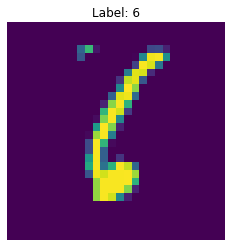

In [18]:
plot_random_number(train_df)

## Data preprocessing

In [19]:
# Split train data into train and validation data sets
from sklearn.model_selection import train_test_split

X_df = train_df.drop(labels = 'label', axis = 1)
y_df = train_df['label']

X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(X_df, y_df, test_size = 0.2)

X_train_df.shape, X_val_df.shape, y_train_df.shape, y_val_df.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [20]:
# Convert our dataframes into tensors and one hot encode our labels (multiclass problem)
import tensorflow as tf

X_train_tensor = tf.convert_to_tensor(X_train_df)
X_val_tensor = tf.convert_to_tensor(X_val_df)
y_train_tensor = tf.convert_to_tensor(tf.one_hot(y_train_df, depth = 10))
y_val_tensor = tf.convert_to_tensor(tf.one_hot(y_val_df, depth = 10))

X_train_tensor, y_train_tensor

(<tf.Tensor: shape=(33600, 784), dtype=int64, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])>,
 <tf.Tensor: shape=(33600, 10), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)>)

In [21]:
# Check min and max values into our tensors
tf.reduce_min(X_train_tensor), tf.reduce_max(X_train_tensor)

(<tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=255>)

In [22]:
tf.reduce_min(y_train_tensor), tf.reduce_max(y_train_tensor)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [23]:
# So we have to normalize our data!
from tensorflow.keras.utils import normalize
X_train_tensor = normalize(X_train_tensor)
X_val_tensor = normalize(X_val_tensor)

tf.reduce_max(X_train_tensor), tf.reduce_max(y_train_tensor)


(<tf.Tensor: shape=(), dtype=float64, numpy=0.27419354838709675>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [24]:
# Reshape our tensors
X_train = tf.reshape(X_train_tensor, [-1, 28, 28, 1])
X_val = tf.reshape(X_val_tensor, [-1, 28, 28, 1])
y_train = tf.squeeze(y_train_tensor)
y_val = tf.squeeze(y_val_tensor)
X_train.shape, y_train.shape

(TensorShape([33600, 28, 28, 1]), TensorShape([33600, 10]))

# Create the model

In [25]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import Sequential

model = Sequential()
model.add(Conv2D(100,(3,3), activation='relu', input_shape = (28,28,1))),
model.add(MaxPooling2D(2, 2)),
model.add(Conv2D(100,(5,5), activation='relu')),
model.add(MaxPooling2D(2, 2)),
model.add(Dropout(0.1)),
model.add(Flatten()),
model.add(Dense(256, activation='relu')),
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

BATCH_SIZE = 32
EPOCHS = 5
history = model.fit(x=X_train, y = y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(X_val, y_val),
              shuffle=True)


Epoch 1/5
1050/1050 [==============================] - 15s 5ms/step - loss: 0.2000 - accuracy: 0.9376 - val_loss: 0.1036 - val_accuracy: 0.9674
Epoch 2/5
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0603 - accuracy: 0.9810 - val_loss: 0.0705 - val_accuracy: 0.9786
Epoch 3/5
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0549 - val_accuracy: 0.9849
Epoch 4/5
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0500 - val_accuracy: 0.9867
Epoch 5/5
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0441 - val_accuracy: 0.9874


In [26]:
model.evaluate(X_val, y_val)

263/263 [==============================] - 1s 3ms/step - loss: 0.0441 - accuracy: 0.9874


[0.04413054883480072, 0.9873809814453125]